In [1]:

import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
import numpy as np
import scipy.io 
import mne
import os
import sys
sys.path.insert(0, 'E:/workspace/my_py_toolbox/') 
from hm_tools import *

in_path = r"E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/" # 分析哪个roi就输入哪个文件夹的数据

subjects = [104, 108, 116, 117, 119, 120] # vmpfc 
# subjects = [104, 108, 109, 112, 113, 116, 117, 119, 120, 124]  # hippo 
# subjects = [109, 116, 119, 120, 122] # striatum  



def gaussian_filter(data, time_span=50, fs=1000, axis=-1):

    # time_span: the length of the window (ms)
    from scipy import signal, ndimage

    winsize = time_span * fs / 1000

    # create a window(kernel) with value follow a gaussian distrubution
    window = signal.gaussian(winsize,std = int((winsize)/5) ) # Note! In matlab function 'gausswin',the parameter is α(defaut = 2.5), here is std, std = winsize/2α

    # Make the sum of the window = 1
    gusWin = window/sum(window)

    # convolve the last dimension
    data_filtered = ndimage.convolve1d(input=data, weights=gusWin, axis=axis, mode='nearest', origin=0)

    return data_filtered

In [2]:
from mne.time_frequency import tfr_morlet

# fast escaped trials '1/5/6'
# fast captured trials '2/5/7/8'
# slow escaped trials '3/5/6'
# slow premature trials '10/5/6'
# slow captured trials '4/5/7/8'

freqs=np.arange(70, 120, 5)

n_cycles=10
time_span = 100
ch_names = []
all_smooth_hgb_fast_data=[]
for i in range(len(subjects)):

    # import the data
    ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')

    # correct some wrong event number
    if subjects[i]==108:
        ROI_epochs.events[61, 2] = 3
    if subjects[i]==119:
        ROI_epochs.events[49, 2] = 1
    if subjects[i]==109:
        ROI_epochs.events[4, 2] = 1

        
    # fast escaped or captured
    tfr_ROI_epoch_fast = tfr_morlet(ROI_epochs['1/5/6'], freqs, n_cycles=n_cycles, return_itc=False, average = True, use_fft=True)
    tfr_ROI_epoch_slow = tfr_morlet(ROI_epochs['2/5/7/8'], freqs, n_cycles=n_cycles, return_itc=False, average = True, use_fft=True)
    # slow escaped or premature
    # tfr_ROI_epoch_fast = tfr_morlet(ROI_epochs['3/5/6'], freqs, n_cycles=n_cycles, return_itc=False, average = True, use_fft=True)
    # tfr_ROI_epoch_slow = tfr_morlet(ROI_epochs['10/5/6'], freqs, n_cycles=n_cycles, return_itc=False, average = True, use_fft=True)

    tfr_ROI_epoch_fast.apply_baseline(mode='logratio', baseline=(-0.10, 0)) # 'mean' | 'ratio' | 'logratio' | 'percent' | 'zscore' | 'zlogratio'
    tfr_ROI_epoch_slow.apply_baseline(mode='logratio', baseline=(-0.10, 0)) # 'mean' | 'ratio' | 'logratio' | 'percent' | 'zscore' | 'zlogratio'

    smooth_hgb_fast_data = gaussian_filter(data=np.mean(tfr_ROI_epoch_fast.data,axis=1), time_span=time_span, fs=ROI_epochs.info['sfreq'])
    smooth_hgb_slow_data = gaussian_filter(data=np.mean(tfr_ROI_epoch_slow.data,axis=1), time_span=time_span, fs=ROI_epochs.info['sfreq'])


    
    if i == 0:
        all_smooth_hgb_fast_data = smooth_hgb_fast_data
        all_smooth_hgb_slow_data = smooth_hgb_slow_data
        ch_names = np.array(ROI_epochs.ch_names)
    else:
        all_smooth_hgb_fast_data = np.vstack((all_smooth_hgb_fast_data, smooth_hgb_fast_data))
        all_smooth_hgb_slow_data = np.vstack((all_smooth_hgb_slow_data, smooth_hgb_slow_data))
        ch_names = np.hstack((ch_names, np.array(ROI_epochs.ch_names)))
    
    print(smooth_hgb_slow_data.shape)

Extracting parameters from E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/104.set...


Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-2-1103f430dc0b>:18: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
(6, 4500)
Extracting parameters from E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/108.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-2-1103f430dc0b>:18: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
(5, 4500)
Extracting parameters from E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/116.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-2-1103f430dc0b>:18: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
(15, 4500)
Extracting parameters from E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/117.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-2-1103f430dc0b>:18: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
(20, 4500)
Extracting parameters from E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/119.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-2-1103f430dc0b>:18: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
(24, 4500)
Extracting parameters from E:/workspace/sEEG_slow_fast_attack/roi_data/vmpfc/120.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-2-1103f430dc0b>:18: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ROI_epochs = mne.read_epochs_eeglab(in_path + str(subjects[i]) + '.set')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
(39, 4500)


In [3]:
# create a new epochs info
info = mne.create_info(ch_names = list(ch_names), ch_types = 'eeg', sfreq = 1000)

# create a new ROI based epochs
all_smooth_hgb_fast = mne.EvokedArray(data = all_smooth_hgb_fast_data, info = info, tmin=-0.5)
all_smooth_hgb_slow = mne.EvokedArray(data = all_smooth_hgb_slow_data, info = info, tmin=-0.5)
all_smooth_hgb_fast.apply_baseline(baseline=(-0.1, 0))
all_smooth_hgb_slow.apply_baseline(baseline=(-0.1, 0))

times = all_smooth_hgb_slow.times

all_smooth_hgb_fast = all_smooth_hgb_fast.crop(-0.1, 1.0)
all_smooth_hgb_slow = all_smooth_hgb_slow.crop(-0.1, 1.0)

all_smooth_hgb_fast_crop = all_smooth_hgb_fast
all_smooth_hgb_slow_crop = all_smooth_hgb_slow

n_permutations = 10000

# 两种情况下相对于0的显著性
T_obs_fast, clusters_fast, cluster_p_values_fast, H0_fast  = mne.stats.permutation_cluster_1samp_test(all_smooth_hgb_fast_crop.data, 
                                                    out_type='mask',n_permutations=n_permutations, t_power=1, n_jobs=4, tail=0, verbose=None)

T_obs_slow, clusters_slow, cluster_p_values_slow, H0_slow  = mne.stats.permutation_cluster_1samp_test(all_smooth_hgb_slow_crop.data, 
                                                    out_type='mask',n_permutations=n_permutations, t_power=1, n_jobs=4, tail=0, verbose=None)

# 两者之间的显著性
T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test([all_smooth_hgb_slow_crop.data, all_smooth_hgb_fast_crop.data],
                                                                out_type='mask', n_permutations=n_permutations, n_jobs=4,tail=0
                                                                ,verbose=None, t_power=1)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Using a threshold of 1.982173
stat_fun(H1): min=-4.772624 max=1.591000
Running initial clustering
Found 4 clusters


<ipython-input-3-5d0ff6948f6c>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'MF4', "MF'12", 'MF3', "bOB'7", 'bOB3', 'bOB7', "bOB'1", "bOB'2", "MF'2", "MF'8", "MF'6", "bOB'6", "MF'3", 'bOB2', "bOB'3", 'bOB6', 'bOB4', 'MF2', "MF'4", "MF'9", 'bOB1', "bOB'5", "MF'11", "MF'1", "MF'10", "bOB'4", "MF'7", "MF'5", 'bOB5'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names = list(ch_names), ch_types = 'eeg', sfreq = 1000)


Permuting 9999 times...


100%|██████████|  : 9999/9999 [00:04<00:00, 2400.30it/s]


Computing cluster p-values
Done.
Using a threshold of 1.982173
stat_fun(H1): min=-2.369799 max=3.132807
Running initial clustering
Found 4 clusters
Permuting 9999 times...


100%|██████████|  : 9999/9999 [00:02<00:00, 3333.22it/s]

Computing cluster p-values
Done.
Using a threshold of 3.884870



<ipython-input-3-5d0ff6948f6c>:28: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test([all_smooth_hgb_slow_crop.data, all_smooth_hgb_fast_crop.data],


stat_fun(H1): min=0.000003 max=17.313857
Running initial clustering
Found 7 clusters
Permuting 9999 times...


100%|██████████|  : 9999/9999 [00:05<00:00, 1807.56it/s]


Computing cluster p-values
Done.


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

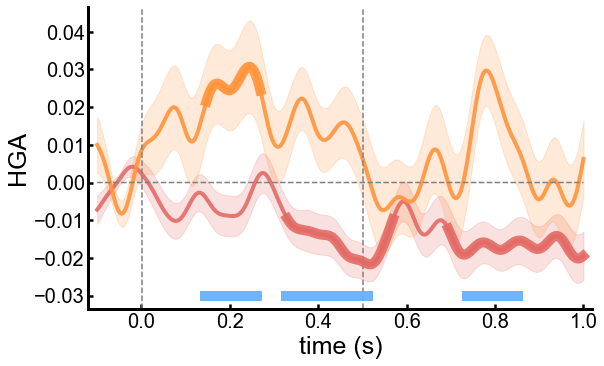

In [5]:
# line_color = ['#E36A65','#5CBBBF']    # 红色湖蓝色 正确快攻击，正确慢攻击 
line_color = ['#E36A65','#FF943C']    # 红色橙色 正确快攻击，错误快攻击  DE6B48  FFADC6
# line_color = ['#5CBBBF','#4482CD']    #  正确慢攻击，过快慢攻击  DE6B48  FFADC6
# line_color = ['#FF943C','#4482CD']    #  错误快攻击，过快慢攻击  DE6B48  FFADC6

figsize=(10,6) 
title_size=20
legend_size=15

ticksize=10
subplots_adjust=[0.15, 0.15, 0.85, 0.85]


import matplotlib.pyplot as plt
import numpy as np
import os


event_0_line_color = line_color[0]
event_1_line_color = line_color[1]

# the number of time axis
times = all_smooth_hgb_slow.times

plt.close('all')
plt.rcParams['figure.figsize'] = figsize # 设置figure_size尺寸
# plt.title('ROI: '+ roi_name, fontdict={'fontsize':title_size})

epoch_mean={}
epoch_mean[0] = np.squeeze(np.average(all_smooth_hgb_fast.data, axis=0))
epoch_mean[1] = np.squeeze(np.average(all_smooth_hgb_slow.data, axis=0))

plt.plot(times, epoch_mean[0], color=line_color[0], alpha=0.9, linewidth=4) # , linestyle='--')
plt.plot(times, epoch_mean[1], color=line_color[1], alpha=0.9, linewidth=4) # , linestyle='--')


# Draw the dividing line at 0s 
plt.axvline(times[101], c="gray", ls = "dashed")
plt.axvline(times[601], c="gray", ls = "dashed")
plt.plot(times, np.zeros(len(epoch_mean[0])), color="gray", linestyle="--")

# Drawing error (std)
std_event0 = np.squeeze(np.std(all_smooth_hgb_fast.data, axis=0))
std_event1 = np.squeeze(np.std(all_smooth_hgb_slow.data, axis=0))

se_event0 = std_event0/np.sqrt(all_smooth_hgb_fast.data.shape[0])
se_event1 = std_event1/np.sqrt(all_smooth_hgb_fast.data.shape[0])

plt.fill_between(times, epoch_mean[0] - se_event0, epoch_mean[0] + se_event0, color=line_color[0], alpha=0.2)
plt.fill_between(times, epoch_mean[1] - se_event1, epoch_mean[1] + se_event1, color=line_color[1], alpha=0.2)

# condition 0 to baseline
for i_c, c in enumerate(clusters_fast):
    c = c[0]
    if cluster_p_values_fast[i_c] <= 0.05:
        # plt.axvspan(times[c.start], times[c.stop - 1], color='r', alpha=0.3)
        plt.plot(times[c.start : c.stop - 1], epoch_mean[0][c.start : c.stop-1], color=event_0_line_color, alpha=0.9, linewidth=10)
# condition 1 to baseline
for i_c, c in enumerate(clusters_slow):
    c = c[0]
    if cluster_p_values_slow[i_c] <= 0.05:
        # plt.axvspan(times[c.start], times[c.stop - 1], color='r', alpha=0.3)
        plt.plot(times[c.start : c.stop - 1], epoch_mean[1][c.start : c.stop-1], color=event_1_line_color, alpha=0.9, linewidth=10)

# condition 0 and condition 1
for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        
        plt.plot(times[c.start : c.stop - 1], -0.05 * np.ones(len(epoch_mean[0]))[c.start : c.stop-1], color='#5EACFF', alpha=0.9, linewidth=10)

#hf = plt.plot(times, T_obs, 'g')
#plt.legend((h, ), ('cluster p-value < 0.05', ))
plt.subplots_adjust(left=subplots_adjust[0], bottom=subplots_adjust[1], right=subplots_adjust[2], top=subplots_adjust[3], hspace=0.1,wspace=0.1)

plt.xlim([times[0]-0.02, times[-1]+0.02])

plt.yticks(size=ticksize)
plt.xticks(size=ticksize)

spines_width = 3
ax=plt.gca()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(spines_width)
ax.spines['bottom'].set_linewidth(spines_width)
# sns.despine()


# Axis scale thickness, facing inward
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.set_ylabel("Escape Accuracy", size=ticksize, fontproperties='Arial')

labelsize=25
plt.xlabel("time (s)", fontsize=labelsize, fontproperties='Arial')
plt.ylabel("HGA", size=labelsize, fontproperties='Arial')

# The thickness of coordinates
ticksize = 20
plt.yticks(size=ticksize, fontproperties='Arial')
plt.xticks(size=ticksize, fontproperties='Arial')
# plt.savefig(r'D:\Desktop\项目\seeg\画图\hga_all\stimuli_insula.jpg',dpi=300, overwrite=True)

# plt.savefig(result_path + '/' + permutation_cluster_result['ROI_name'][ROI_num] + ".png", overwrite=True)